In [1]:
import numpy as np
import pandas as pd
import os, glob
import matplotlib.pyplot as plt
import scipy as sp

%matplotlib inline

In [2]:
from utils.tracking import extract, find_params
from utils.tracking import pseudo_voigt_fit1,gaus_fit1, voigt_fit1


In [15]:
## handling the 3D humidity only files. Only took the intergration of 
path  = 'C:/Users/Bin'+chr(39)+'s X1/Box/BNL March 2022 Data/AMohite2/maxs/analysis/3D_hum_only_test5/circular_average'

infiles = glob.glob(os.path.join(path, '*'+'*.dat'))

data = extract(infiles[0])

# find parameter index function



In [16]:
# finding the start and end of an array for the 001 plane
x1_3D = np.where(abs(data[:,0]-.95)<= .01)
ind1 = x1_3D[0][0]
x2_3D = np.where(abs(data[:,0]-1.1)<= .01)
ind2 =x2_3D[0][0]


# finding the start and end of an array for the lead iodide peak
x1_pb = np.where(abs(data[:,0]-.85)<= .01)
ind1_pb = x1_pb[0][0]
x2_pb = np.where(abs(data[:,0]-.97)<= .01)
ind2_pb =x2_pb[0][0]

# plt.figure(figsize = (7,8))
# plt.plot(data[ind1:ind2,0],data[ind1:ind2,1])

# # assuming the 
# time_val = [x for x in parameters if 's' in x][0][:-1]
# print(time_val)

val_pb= []
val_3D = []
time = []
for i in range(len(infiles)):
    data = extract(infiles[i])
    # print(infiles[i])
    parameters = find_params(infiles[i])

    # dont look at the other x position values here
    position = [x for x in parameters if 'x' in x][0]

    if 'x-0.0' not in position:
        # print([x for x in parameters if 'x' in x][0])
        continue
    
    time_val = [x for x in parameters if 's' in x][0][:-1]
    time.append(float(time_val))
    val_3D.append(sp.integrate.trapz(data[ind1:ind2,1]))
    val_pb.append(sp.integrate.trapz(data[ind1_pb:ind2_pb,1]))



val_pb_pos2 = []
val_3D_pos2 = []
time_pos2 = []
for i in range(len(infiles)):
    data = extract(infiles[i])
    # print(infiles[i])
    parameters = find_params(infiles[i])

    # dont look at the other x position values here
    position = [x for x in parameters if 'x' in x][0]

    if 'x-0.0' in position:
        # print([x for x in parameters if 'x' in x][0])
        continue
    
    time_val = [x for x in parameters if 's' in x][0][:-1]
    time_pos2.append(float(time_val))
    val_3D_pos2.append(sp.integrate.trapz(data[ind1:ind2,1]))
    val_pb_pos2.append(sp.integrate.trapz(data[ind1_pb:ind2_pb,1]))





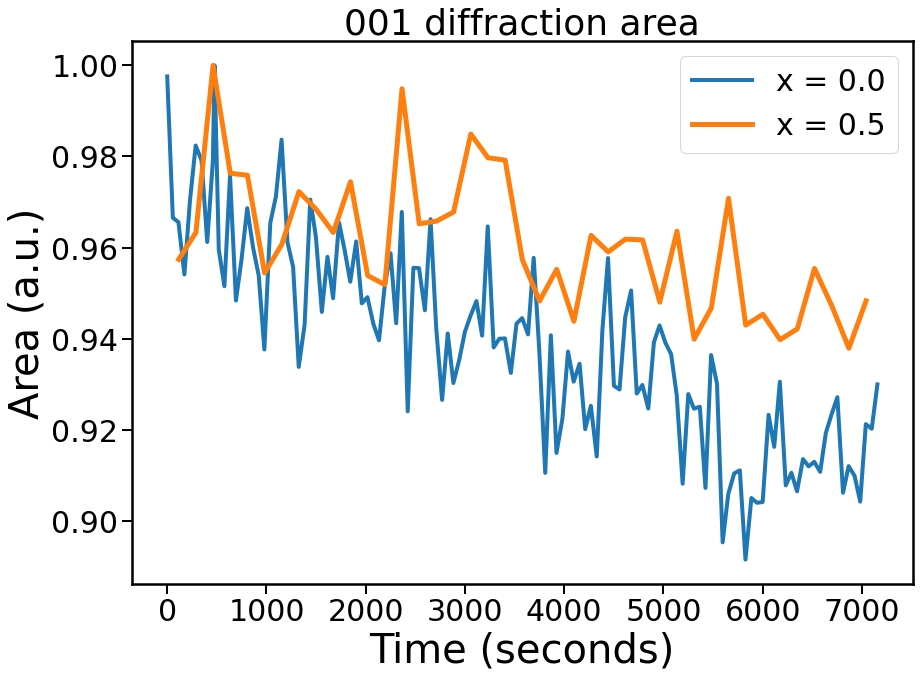

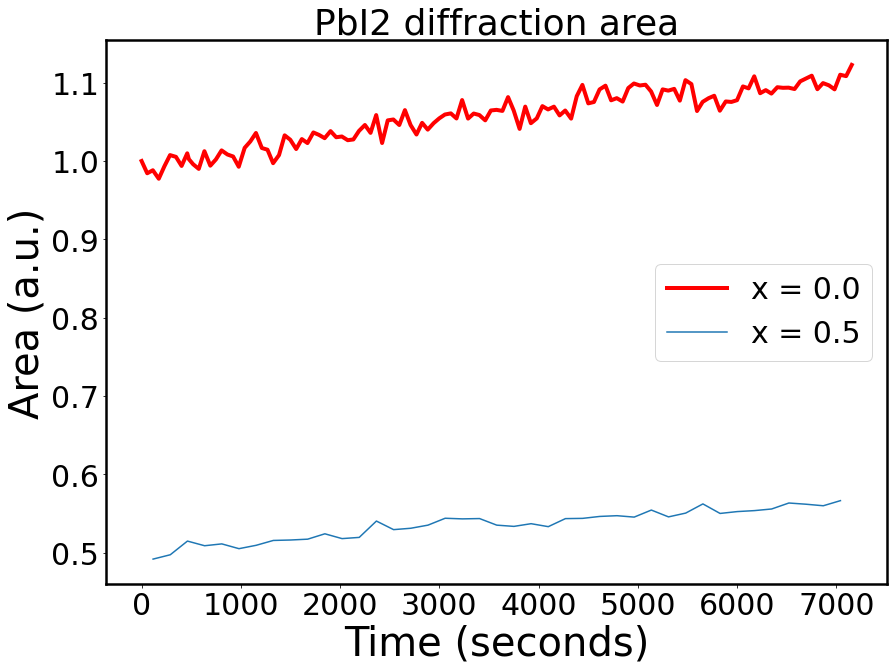

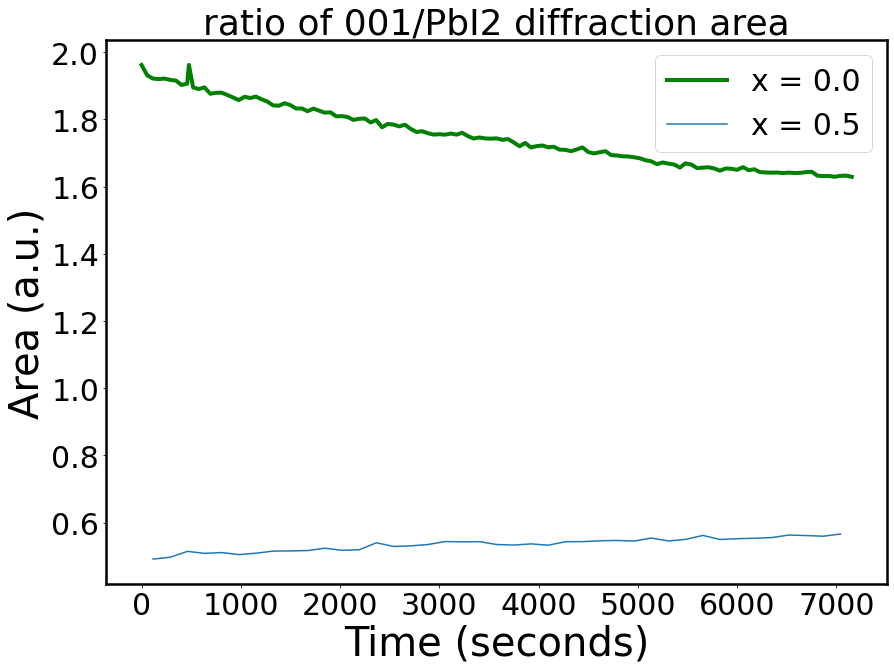

In [46]:
# plt.plot(time, val_3D, '*')

time = np.array(time)
time_pos2 = np.array(time_pos2)
val_3D = np.array(val_3D)
val_pb = np.array(val_pb)
val_3D_pos2 = np.array(val_3D_pos2)
val_pb_pos2 = np.array(val_pb_pos2)


indt = np.argsort(time)
indt2 = np.argsort(time_pos2)

plt.figure(figsize = (14,10))
ax = plt.gca()
plt.plot(time[indt], val_3D[indt]/np.max(val_3D[indt]), label = 'x = 0.0', linewidth = 4)
plt.plot(time_pos2[indt2],val_3D_pos2[indt2]/np.max(val_3D_pos2[indt2]), label= 'x = 0.5', linewidth = 5)
plt.ylabel('Area (a.u.)',fontsize = 40)
plt.xlabel('Time (seconds)',fontsize = 40)
plt.rc('axes', linewidth=2.5)
ax.tick_params(which='both', width=2)
ax.tick_params(which='minor', length=5)
ax.tick_params(which='major', length=10)
plt.rcParams.update({'font.size': 30})
plt.title('001 diffraction area')
plt.legend()



plt.figure(figsize = (14,10))
plt.plot(time[indt], val_pb[indt]/np.max(val_pb[indt[0]]), label = 'x = 0.0', linewidth = 4, color = 'r')
plt.plot(time_pos2[indt2],val_pb_pos2[indt2]/np.max(val_3D_pos2), label = 'x = 0.5')
plt.ylabel('Area (a.u.)',fontsize = 40)
plt.xlabel('Time (seconds)',fontsize = 40)
plt.rc('axes', linewidth=2.5)
ax.tick_params(which='both', width=2)
ax.tick_params(which='minor', length=5)
ax.tick_params(which='major', length=10)
plt.rcParams.update({'font.size': 30})
plt.title('PbI2 diffraction area')
plt.legend()




plt.figure(figsize = (14,10))
plt.plot(time[indt], np.divide(val_3D[indt],val_pb[indt]), label = 'x = 0.0', linewidth = 4, color = 'g')
plt.plot(time_pos2[indt2],val_pb_pos2[indt2]/np.max(val_3D_pos2), label = 'x = 0.5')
plt.ylabel('Area (a.u.)',fontsize = 40)
plt.xlabel('Time (seconds)',fontsize = 40)
plt.rc('axes', linewidth=2.5)
ax.tick_params(which='both', width=2)
ax.tick_params(which='minor', length=5)
ax.tick_params(which='major', length=10)
plt.rcParams.update({'font.size': 30})
plt.title('ratio of 001/PbI2 diffraction area')
plt.legend()


In [6]:
# timestamp = np.arange(0,8000, 1000)

# plt.figure(figsize = (9,9))
# for i in range(len(infiles)):
#     data = extract(infiles[i])
#     # print(infiles[i])
#     parameters = find_params(infiles[i])

#     # dont look at the other x position values here
#     position = [x for x in parameters if 'x' in x][0]

#     if 'x-0.0' not in position:
#         # print([x for x in parameters if 'x' in x][0])
#         continue
    
#     time_val = [x for x in parameters if 's' in x][0][:-1]

#     # print(int(float(time_val)))
#     if int(float(time_val)) %1000 <= 60:
#         print(time_val)
#         plt.plot(data[:,0], data[:,1], label = time_val)
    
# plt.legend()
# plt.show()




This section is the analysis of the 2D BA n=3 perovskite under RT and in 100% 

In [7]:
path  = 'C:/Users/Bin'+chr(39)+'s X1/Box/BNL March 2022 Data/AMohite/maxs/analysis/BA_n3_hum_only_test4/qr_axis'

infiles = glob.glob(os.path.join(path, '*'+'*.dat'))

data = extract(infiles[0])

# finding the start and end of an array for the 001 plane
x1_111 = np.where(abs(data[:,0]-.9)<= .01)
ind1 = x1_111[0][0]
x2_111 = np.where(abs(data[:,0]-1.15)<= .01)
ind2 =x2_111[0][0]

data_file = []
time = []
file_num = []
file_index = []


for i in range(len(infiles)):
    data = extract(infiles[i])
    # print(infiles[i])
    parameters = find_params(infiles[i])

    # dont look at the other x position values here
    position = [x for x in parameters if 'x' in x][0]

    if 'x-0.0' not in position:
        # print([x for x in parameters if 'x' in x][0])
        continue
    
    time_val = [x for x in parameters if 's' in x][0][:-1]
    time.append(float(time_val))

    data_file.append(data)

    file_num.append(parameters[1])

    if float(time_val) == 0.0:
        file_start = parameters[1]
        print('here')

    file_index.append(i)

final_time = []
final_index = []

for i in range(len(file_num)):
    if file_num[i] < file_start:
        continue
    else:
        final_time.append(time[i]) 
        final_index.append(file_index[i])

print(final_index)
print(final_time)


here
[1, 2, 3, 5, 6, 8, 11, 14, 16, 18, 19, 22, 23, 25, 28, 29, 30, 33, 34, 36, 40, 41, 44, 46, 47, 49, 51, 52]
[0.0, 30.7, 61.4, 99.0, 129.7, 167.2, 204.6, 272.8, 310.2, 347.6, 378.3, 415.8, 446.5, 484.0, 527.8, 558.6, 589.4, 626.8, 657.7, 695.1, 769.7, 800.5, 837.8, 875.3, 906.0, 943.6, 981.0, 1011.7]


In [8]:
from utils.tracking import voigt_fit2, plotting_model
final_time = np.array(final_time)
final_index = np.array(final_index)

indx = np.argsort(final_time)
final_time = final_time[indx]
final_index = final_index[indx]


In [47]:
# for i, index in enumerate(final_index):
#     print(infiles[index])
#     print(final_time[i])


C:/Users/Bin's X1/Box/BNL March 2022 Data/AMohite/maxs/analysis/BA_n3_hum_only_test4/qr_axis\BA_n3_hum_only_test4_11_0.0s_RH33.653_x-0.001_th0.150_5.00s_449310_maxs.dat


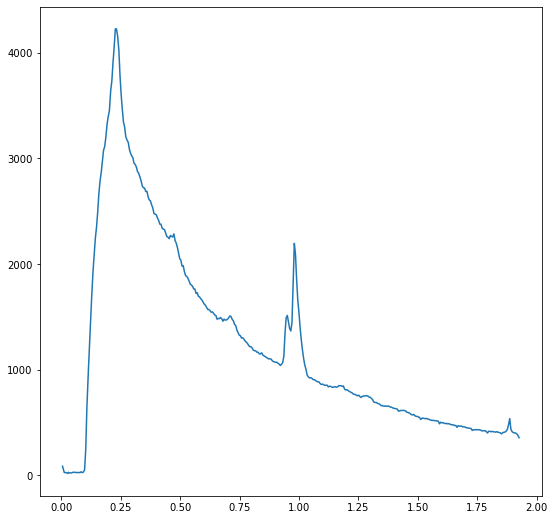

In [10]:
data = extract(infiles[final_index[0]])
print(infiles[final_index[0]])
plt.figure(figsize = (9,9))
plt.plot(data[:,0], data[:,1])

In [11]:
# # subtrack out the background from the data

# # analyzing the 040 peak

# from utils.tracking import background_model

# # finding the start and end of an array for the 040 plane background
# x1_bg = np.where(abs(data[:,0]-.6)<= .01)
# ind1_bg = x1_bg[0][0]
# x2_bg = np.where(abs(data[:,0]-.9)<= .01)
# ind2_bg =x2_bg[0][0]

# bg_data = data_file[indx[0]]

# # finding the start and end of an array for the 404 plane
# x1_111 = np.where(abs(data[:,0]-.65)<= .01)
# ind1 = x1_111[0][0]
# x2_111 = np.where(abs(data[:,0]-.78)<= .01)
# ind2 =x2_111[0][0]

# plt.figure(figsize = (6,6))
# plt.plot(data[ind1:ind2,0], data[ind1:ind2,1])

# indices = np.concatenate((np.arange(ind1_bg, ind1),np.arange(ind2, ind2_bg)),axis = 0 )

# bg_data = bg_data[indices,:]

# bg_model = background_model(bg_data, int_guess= [1000, 10], linear = False)

# plotting_model(bg_data, bg_model)



In [12]:

# # data_file = data_file[indx]

# plt.figure(figsize= (9,9))
# # for i in indx:
# #     plt.plot(data_file[i][ind1:ind2,0],data_file[i][ind1:ind2,1])

# # plt.plot(data_file[indx[0]][ind1:ind2,0],data_file[indx[0]][ind1:ind2,1])


# data = data_file[indx[0]][ind1:ind2,:]

# bg_model = sp.interpolate.interp1d(bg_data[:,0], bg_data[:,1])

# data[:,1] = data[:,1] - bg_model(data[:,0])



In [13]:
from utils.function import fit_xrdV1

# fit_xrdV1(data, range = [.66,.78, 1],bg_range=[.6,.9] , parms= [20, .71, 0.01, 0.01, 0, 0], extra2= False, adapt= [], background_linear= False)

parms = fit_xrdV1(data, range = [.93,1.08, 2],bg_range=[.91,1.12] , parms= [20, .95, 0.01, 0.01, 20, 1, 0.01, 0.01], extra2= [], adapt= [], background_linear= False)


In [14]:
extra2 = []
    
for i, index in enumerate(final_index):
    data = extract(infiles[index])

    # for the 111 peak
    range =[.93,1.08, 2]
    bg_range=[.91,1.12]
    int_gues= [20, .95, 0.01, 0.01, 20, 1, 0.01, 0.01]

    # for the new degradation peak
    # range =[.52,.62, 1]
    # bg_range=[.45,.66]
    # int_gues= [10, .56, 0.01, 0.01, 0, 0]



    parms = fit_xrdV1(data, range = range,bg_range=bg_range , parms= [20, .95, 0.01, 0.01, 20, 1, 0.01, 0.01], extra2= extra2, adapt= [], background_linear= False)
    extra2 = parms

    area1.append(sp.integrate.trapz())

SyntaxError: invalid syntax (Temp/ipykernel_25928/118492502.py, line 2)

In [ ]:
# This is to double check the beam0 position in calibration

# path45  = 'C:/Users/Bin'+chr(39)+'s X1/Box/BNL March 2022 Data/AMohite2/maxs/analysis/3D_hum_only_test5/plus_45'
# path_45 = 'C:/Users/Bin'+chr(39)+'s X1/Box/BNL March 2022 Data/AMohite2/maxs/analysis/3D_hum_only_test5/minus_45'
# path_zero = 'C:/Users/Bin'+chr(39)+'s X1/Box/BNL March 2022 Data/AMohite2/maxs/analysis/3D_hum_only_test5/zero'



# infiles1 = glob.glob(os.path.join(path45, '*_0.0*'+'*.dat'))
# infiles2 = glob.glob(os.path.join(path_45, '*_0.0*'+'*.dat'))
# infiles3 = glob.glob(os.path.join(path_zero, '*_0.0*'+'*.dat'))

# print(infiles1)
# print(infiles2)
# print(infiles3)

# data_plus = extract(infiles1[0])
# data_minus = extract(infiles2[0])
# data_zero = extract(infiles3[0])

# # finding the start and end of an array
# x1 = np.where(abs(data_plus[:,0]-.95)<= .01)
# ind1 = x1[0][0]
# x2 = np.where(abs(data_plus[:,0]-1.08)<= .01)
# ind2 =x2[0][0]


# # # finding the start and end of an array
# # x1 = np.where(abs(data_minus[:,0]-.2)<= .01)
# # ind1 = x1[0][0]
# # x2 = np.where(abs(data_minus[:,0]-3)<= .01)
# # ind2 =x2[0][0]

# plt.figure(figsize = (8,10))
# plt.plot(data_plus[ind1:ind2,0], data_plus[ind1:ind2,1], 'r')
# plt.plot(data_minus[ind1:ind2,0], data_minus[ind1:ind2,1], 'b')
# plt.plot(data_zero[ind1:ind2,0], data_zero[ind1:ind2,1], 'g')
